**What Is Fake News ?**

False news, also known as unwanted news, false stories, misconceptions or fraudulent stories, types of stories that contain deliberate information or frauds that are spread through traditional media (print and broadcast) or online media. Digital news has revived and increased the use of fake news, or yellow journalism. These stories are often referred to as information that is not in the media but sometimes finds its way into the mainstream media as well.


*   It causes panic
*   Damaging the reputation of public and private organizations
*   It deceives the people, for the benefit of the deceivers
*   Motivated by a personal vendetta, some people support such things.

<br>
<br>

**PROBLEM :** 
<br>
How to distinguish between a real news and a fake news?

<br>
<br>

**SOLUTION :**

We can show an algorithm that has a large number of false and real news stories to learn to distinguish between them automatically, and then give a possible score or percentage of confidence such as a given news release is true or false.

# Exploratory Data Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

**Loading The Dataset**

In [4]:
f = pd.read_csv('/content/drive/MyDrive/Datasets/Fake News Detection/Fake.csv', delimiter = ',')
t = pd.read_csv('/content/drive/MyDrive/Datasets/Fake News Detection/True.csv', delimiter = ',')

**Observing the top 5 rows of fake and true data**

In [5]:
f.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
t.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Now combining these two dataset to one dataset to simplify processing.

Also to combine we need to add an extra column as 'temp' to differtiate news as 1=true_news 0=fake_news

In [7]:
f['temp']= 0
t['temp']= 1

datas = pd.DataFrame()
datas = t.append(f)

**Observing the top 5 rows of dataset**

In [8]:
datas.head()

,title,text,subject,date,temp
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


**Checking the dimensions**

In [9]:
print(datas.shape)

(44898, 5)


**Column 'Date' and 'Subject' are important to Descriptive analysis but here for prediction they are less important so dropping these columns.**

In [10]:
column = ['date','subject']
datas = datas.drop(columns=column)

**Cheking the dimensions after dropping**

In [11]:
print(datas.shape)

(44898, 3)


**Exploring the data**

In [12]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   temp    44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


**Created array of 'title' column as input_array for preprocessing**

In [13]:
input_arr=np.array(datas['title'])

# Natural Language Processing

*Downloading Stopwords*

In [14]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

***Stopwords***: *A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.*
https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

***PortStemmer***: *A PortStemmer is an algorithm used for removing the commoner morphological and inflexional endings from words in English.  For example: words such as “Likes”, ”liked”, ”likely” and ”liking” will be reduced to “like” after stemming.*
https://www.geeksforgeeks.org/python-stemming-words-with-nltk/

**Using nltk and importing Stopwords(For dealing with stopwords) and PortStemmer(For stemming)**

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []

for i in range(0, 40000):
    newArr = re.sub('[^a-zA-Z]', ' ', input_arr[i])
    #The sub() function replaces the matches with the text of your choice,
    #in this case "[a-zA-Z]" is getting replaced with blank space
    #input_arr[i] is the array of 'title' column.

    #[a-zA-Z]: Returns a match for any character alphabetically between a and z, lower case OR upper case

    newArr = newArr.lower()
    #Converting into lowercase

    newArr = newArr.split()
    #The split() method splits a string into a list.

    ps = PorterStemmer()
    newArr = [ps.stem(word) for word in newArr if not word in set(stopwords.words('english'))]
    #ps.stem(word) is stemming the words
    #the word will be considered if the word is not a stopword
    #set(stopwords.words('english')= checks any kind of stopwords in English language

    newArr = ' '.join(newArr)
    #joins the string with blank spaces

    corpus.append(newArr)
    #adding strings into the corpus list

In [16]:
datas

,title,text,temp
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


***CountVectorizer*** : *CountVectorizer is a tool provided by the scikit-learn library. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.* 
https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(max_features = 5000)
#max_features: The CountVectorizer will select the
#words/features/terms which occur the most frequently.
#It takes absolute values so if you set the ‘max_features = 3’,
#it will select the 3 most common words in the data.

X = countv.fit_transform(corpus).toarray()
y = datas.iloc[0:40000, 2].values

X=independent_variable(title)
</br> y=dependent_variable(sentiment 0 or 1)

</br>
Basically what I did here is created a bag of words (https://machinelearningmastery.com/gentle-introduction-bag-words-model/)i.e, X will have top 5000 most common words in array form

# Modelling

**Splitting the dataset into the Training set and Test set in 80-20 ratio**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

**Fitting Logistic Regression to the Training set**

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Predicting the Test set results**

In [20]:
y_pred = classifier.predict(X_test)

# Model Evaluation

**Making the Confusion Matrix**

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [22]:
print(cm)

[[3488  264]
 [ 140 4108]]


**Getting more details**

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3752
           1       0.94      0.97      0.95      4248

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000



TP – True Positives
TN - True Negatives
FP – False Positives
FN – False Negatives

Precision: Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

F1 score – Percent of positive predictions were correct.
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

**Getting Accuracy**

In [24]:
from sklearn.metrics import accuracy_score
print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Accuarcy: 94.95


**Confusion matrix in a well plotted chart**

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

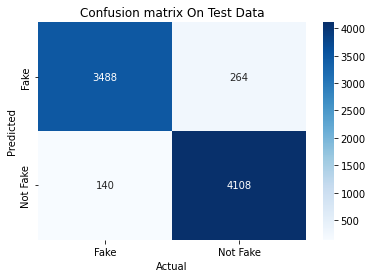

In [26]:
new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

# Saving The Model

We will use the pickle operation to serialize the model and save the serialized format to a file.

In [27]:
import pickle
pickle.dump(classifier, open('Fake_News_Model', 'wb'))